Wilbert Bryan Wibowo - 0706022210017

Tjok Istri Vicky Savitri - 0706022210027

## Import Library

In [14]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

## Load Dataset
The Coronavirus dataset contains 10 features including: <br>
ㆍCountry: Name of the country.<br>
ㆍ Other names: Alternative or additional names for the country.<br>
ㆍISO 3166-1 alpha-3 CODE: Three-letter country code as per ISO standards.<br>
ㆍPopulation: Total population of the country.<br>
ㆍContinent: The continent where the country is located.<br>
ㆍ Total Cases: Total reported Covid-19 cases in the country.<br>
ㆍ Total Deaths: Total reported deaths due to Covid-19.<br>
ㆍ Tot Cases/1M pop: Total cases per 1 million people.<br>
ㆍ Tot Deaths/1M pop: Total deaths per 1 million people.<br>
ㆍ Death percentage: Percentage of deaths compared to total cases.<br>


In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/WilbertBryan/dataset/refs/heads/main/COVID-19%20Coronavirus.csv")
data.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [16]:
data.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [18]:
data.rename(columns={'Tot Cases//1M pop': 'Total Cases/1M pop', 'Tot Deaths/1M pop': 'Total Deaths/1M pop'}, inplace=True)
data.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [19]:
data = data.drop(columns=['Country','Other names','ISO 3166-1 alpha-3 CODE'])
data.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


In [20]:
data['Continent'] = data['Continent'].map({'Asia': 1, 'Europe': 2, 'Africa': 3, 'Latin America and the Caribbean': 4, 'Oceania': 5, 'Northern America':6})
data.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,40462186,1,177827,7671,4395,190,4.313743
1,2872296,2,273870,3492,95349,1216,1.275058
2,45236699,3,265691,6874,5873,152,2.587216
3,77481,2,40024,153,516565,1975,0.382271
4,34654212,3,99194,1900,2862,55,1.915438


check the data type

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Population           225 non-null    int64  
 1   Continent            225 non-null    int64  
 2   Total Cases          225 non-null    int64  
 3   Total Deaths         225 non-null    int64  
 4   Total Cases/1M pop   225 non-null    int64  
 5   Total Deaths/1M pop  225 non-null    int64  
 6   Death percentage     225 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 12.4 KB


In [22]:
data.describe()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
count,2.250000e+02,225.000000,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.782222,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,1.326799,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.000000,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,3.000000,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,4.000000,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,6.000000,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


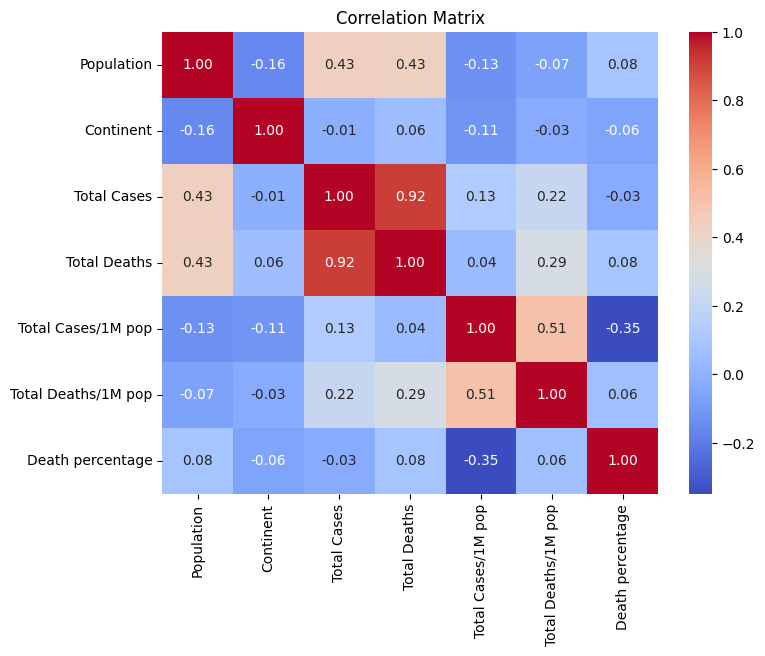

In [23]:
plt.figure(figsize=(8, 6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
data.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,0.038789,-1.346244,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,-0.590870,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,0.164504,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,-0.590870,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,0.164504,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


## K-Mean Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

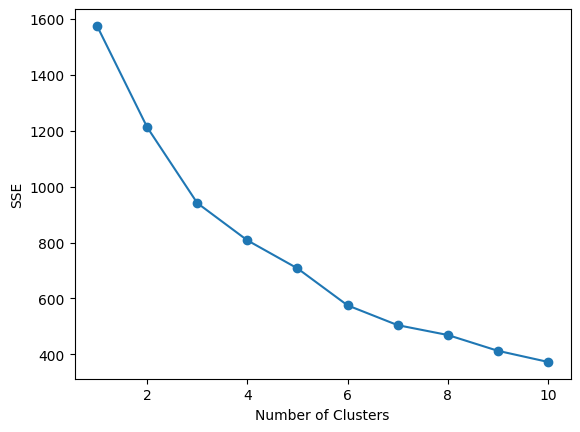

In [25]:
# set the parameter for evaluating K
sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [26]:
# choosing best K
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is ", best_k)

the best k for your model is  3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, n_init= 300, random_state=42)
y_pred = kmeans.fit_predict(data)
y_pred

array([2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int32)

In [28]:
# Save the original column names before applying inverse_transform
data = pd.DataFrame(scaler.inverse_transform(data), columns=data.columns)

data['KMeans'] = y_pred

data.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage,KMeans
0,40462186.0,1.0,177827.0,7671.0,4395.0,190.0,4.313743,2
1,2872296.0,2.0,273870.0,3492.0,95349.0,1216.0,1.275058,2
2,45236699.0,3.0,265691.0,6874.0,5873.0,152.0,2.587216,2
3,77481.0,2.0,40024.0,153.0,516565.0,1975.0,0.382271,1
4,34654212.0,3.0,99194.0,1900.0,2862.0,55.0,1.915438,2


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [29]:
# aggregation
def single_mode(series):
    return series.mode()[0] if not series.mode().empty else np.nan

cluster_summary = data.groupby(y_pred).agg({
    'Population': ['mean', 'min', 'max'],
    'Continent': [single_mode, 'min', 'max'],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Total Cases/1M pop': ['mean', 'min', 'max'],
    'Total Deaths/1M pop': ['mean', 'min', 'max'],
})

cluster_summary = cluster_summary.rename_axis("KMeans")

cluster_summary_transposed = cluster_summary.T

new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")

cluster_summary_transposed

KMeans                              Cluster 0     Cluster 1     Cluster 2
Population          mean         6.511198e+08  1.530228e+07  3.294816e+07
                    min          2.152045e+08  9.930000e+03  8.050000e+02
                    max          1.403754e+09  1.460440e+08  1.439324e+09
Continent           single_mode  1.000000e+00  2.000000e+00  3.000000e+00
                    min          1.000000e+00  1.000000e+00  1.000000e+00
                    max          6.000000e+00  5.000000e+00  6.000000e+00
Total Cases         mean         5.162264e+07  3.261750e+06  5.714682e+05
                    min          2.999982e+07  4.150000e+03  1.000000e+00
                    max          8.183905e+07  2.599785e+07  9.818328e+06
Total Deaths        mean         7.299597e+05  3.437049e+04  9.062861e+03
                    min          5.213880e+05  6.000000e+00  0.000000e+00
                    max          1.008222e+06  3.697080e+05  3.232120e+05
Total Cases/1M pop  mean         1.382627e+05  2.937379e+05  5.191832e+04
                    min          3.065300e+04  8.346600e+04  9.000000e+00
                    max          2.447340e+05  6.960440e+05  3.407030e+05
Total Deaths/1M pop mean         2.151333e+03  2.140718e+03  5.092431e+02
                    min          3.710000e+02  2.930000e+02  0.000000e+00
                    max          3.068000e+03  6.286000e+03  2.669000e+03

In [30]:
# count data from each cluster
data['KMeans'].value_counts().sort_index()

,count
KMeans,
0,3
1,78
2,144


In [31]:
# write down your interpretation from the cluster that you have been made

# Cluster 0 mewakili negara berpenduduk padat dengan dampak COVID-19 yang signifikan,
# seperti negara-negara dengan ekonomi besar yang berpenduduk padat contohnya India atau Cina
# Cluster 0 memiliki rata-rata populasi 651 juta penduduk, dan continent yang paling banyak muncul adalah asia. Jumlah kasus yang ada sangat tinggi yaitu 51.6 juta dan memiliki
# tingkat kematian yang tinggi yaitu 729,957.

# Cluster 1 mewakili negara-negara yang terkena dampak sedang, kemungkinan negara-negara berukuran sedang atau
# maju dengan sistem layanan kesehatan yang baik namun jumlah kasus yang dilaporkan tinggi karena pengujian dan transparansi
# cluster 1 memiliki rata-rata populasi 15 juta penduduk, dan continent yang paling banyak muncul adalah eropa. Jumlah Kasus yang ada sebesar 3.26 yaitu sedang dan memiliki tingkat
# kematian 34,370.

# Cluster 2 mewaliki negara-negara yang terkena dampak kecil, mungkin negara-negara yang lebih kecil, negara-negara
# dengan pengujian lebih sedikit, atau negara-negara yang berhasil menahan pandemi.
# Cluster 2 memiliki rata-rata populasi 32.9 juta penduduk, dan contintent yang paling banyak muncul adalah afrika. Jumlah kasus yang ada yaitu 571,468 dan memliki tingkat
# kematian yang rendah yaitu 9,628.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

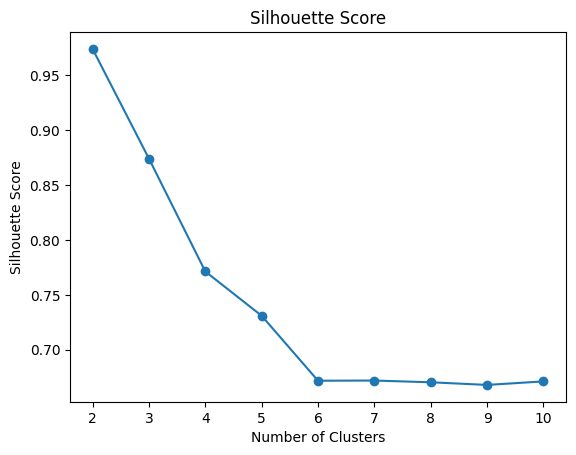

In [32]:
silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(data, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [33]:
best_k = range(2,12)[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters is: {best_k}")

The best number of clusters is: 2


Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [34]:
# agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = agglo.fit_predict(data_scaled)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [35]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
data['Agglo'] = y_hc

# show the df
data.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage,KMeans,Agglo
0,40462186.0,1.0,177827.0,7671.0,4395.0,190.0,4.313743,2,0
1,2872296.0,2.0,273870.0,3492.0,95349.0,1216.0,1.275058,2,0
2,45236699.0,3.0,265691.0,6874.0,5873.0,152.0,2.587216,2,0
3,77481.0,2.0,40024.0,153.0,516565.0,1975.0,0.382271,1,0
4,34654212.0,3.0,99194.0,1900.0,2862.0,55.0,1.915438,2,0


Display the cluster summary in the form of a dataframe.

In [36]:
# Apply aggregation
cluster_summary = data.groupby(y_hc).agg({
    'Population': ['mean', 'min', 'max'],
    'Continent': [single_mode, 'min', 'max'],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Total Cases/1M pop': ['mean', 'min', 'max'],
    'Total Deaths/1M pop': ['mean', 'min', 'max'],
})

cluster_summary = cluster_summary.rename_axis('Agglo')

cluster_summary

Population                              Continent            \
               mean          min           max single_mode  min  max   
Agglo                                                                  
0      2.123420e+07        805.0  2.785865e+08         3.0  1.0  6.0   
1      1.059160e+09  334400597.0  1.439324e+09         1.0  1.0  6.0   

        Total Cases                         Total Deaths                     \
               mean       min         max           mean     min        max   
Agglo                                                                         
0      1.651140e+06       1.0  29999816.0   20908.022523     0.0   660269.0   
1      4.167428e+07  154738.0  81839052.0  511416.000000  4638.0  1008222.0   

      Total Cases/1M pop                  Total Deaths/1M pop               
                    mean    min       max                mean  min     max  
Agglo                                                                       
0          137509.409910    9.0  696044.0         1096.270270  0.0  6286.0  
1           91831.666667  108.0  244734.0         1129.666667  3.0  3015.0

In [37]:
grouped = data.groupby(y_hc)
cluster_summary['Count'] = grouped.size()
cluster_summary['Count']

,Count
Agglo,
0,222
1,3


In [38]:
# write down your interpretation from the cluster that you have been made

# Agglo 0 mewakili negara-negara dengan populasi yang lebih rendah dan lebih sedikit kasus atau kematian.
# Meskipun jumlah totalnya lebih kecil, dampak per orang (kasus dan kematian per 1 juta populasi) masih dapat
# bervariasi secara signifikan, dengan beberapa wilayah mengalami dampak lokal yang lebih tinggi.
# Ini mencakup negara-negara yang lebih kecil atau berpenduduk lebih sedikit, atau negara-negara dengan upaya penanggulangan yang berhasil,
# serta negara-negara dengan kapasitas pengujian/pelaporan yang terbatas

# Agglo 1 mewakili sekelompok kecil secara global dengan populasi besar dan jumlah total kasus dan kematian yang sangat tinggi.
# Kasus/kematian per orang yang lebih rendah dapat menunjukkan sistem perawatan kesehatan atau strategi mitigasi yang lebih baik di wilayah ini.

**Hierarchical Visualization**

Single Linkage

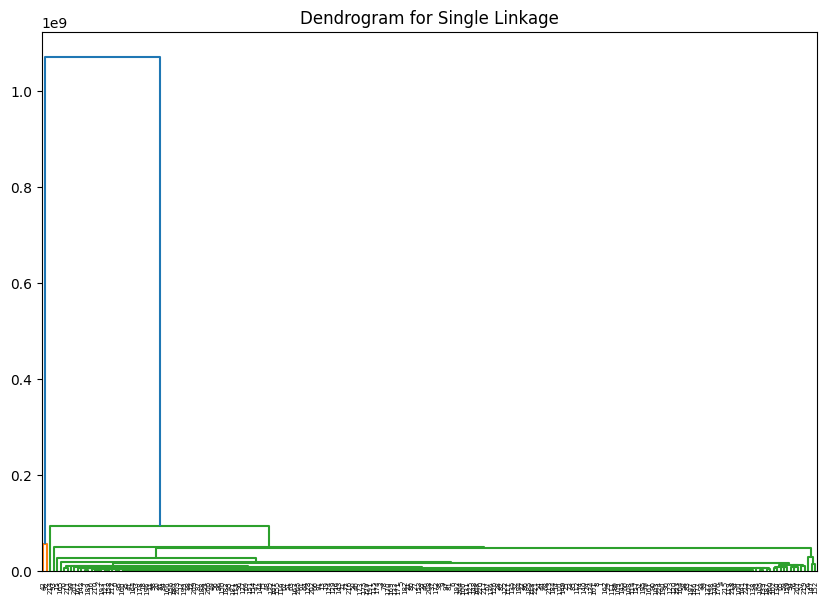

In [39]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(data, method='single'))
plt.show()

complete linkage

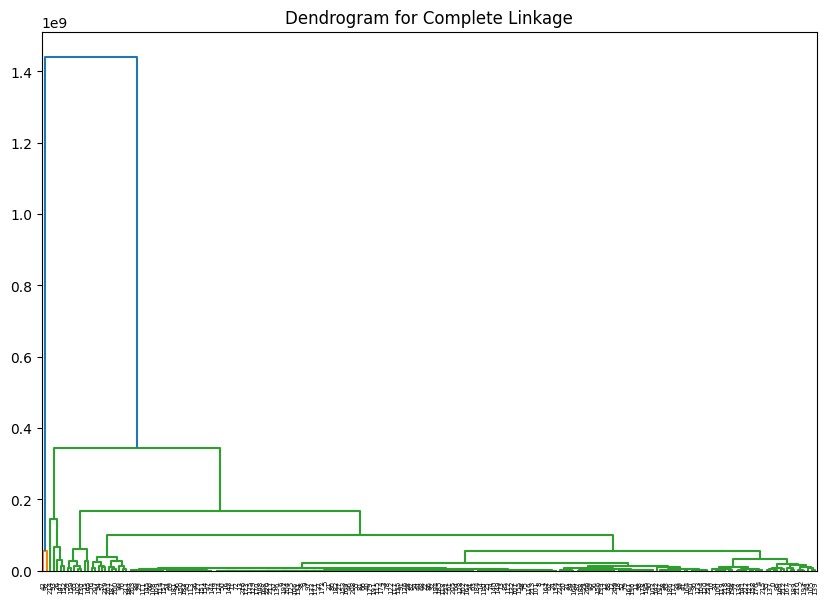

In [40]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(data, method='complete'))
plt.show()

average linkage

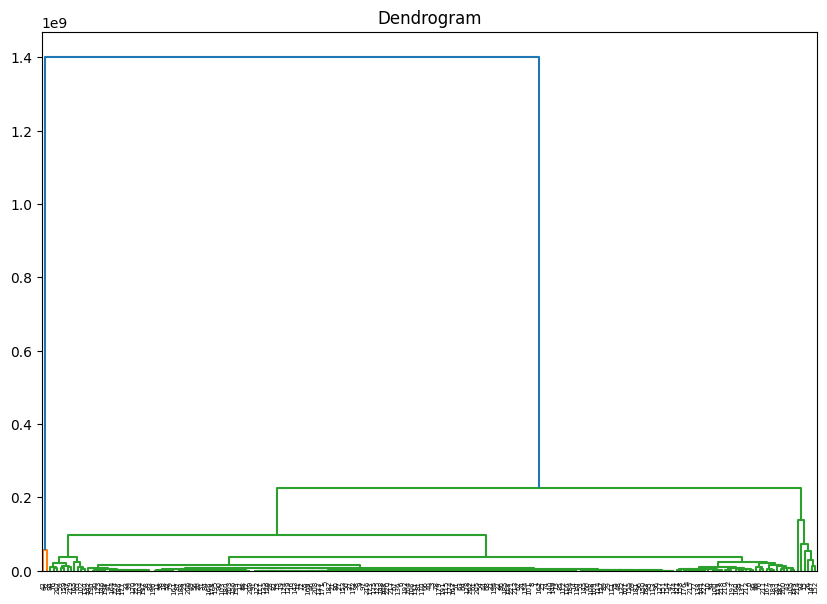

In [41]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(data, method='average'))
plt.show()

ward method

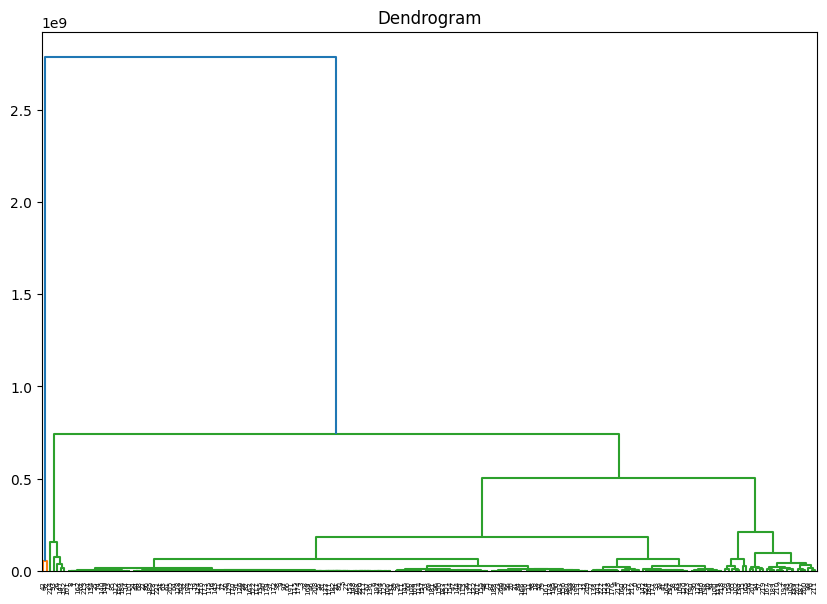

In [42]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(data, method='ward'))
plt.show()